In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, Button
import ipywidgets as widgets
import scipy.ndimage as ndimage
from scipy.optimize import curve_fit
from matplotlib.patches import Circle
import xarray
import scipy as sp

In [2]:
sys.path.insert(1, os.path.join(os.path.join(os.path.abspath(""), os.pardir), os.pardir))
import neurotorchmz as neuro
from neurotorchmz.utils.image import ImgObj
neuro.Start_Background()
%matplotlib inline

Running threads: MainThreadIOPubHeartbeatControlIPythonHistorySavingThreadThread-1Thread-3 (Start)Thread-21
Closing
Exit Neurotorch


In [ ]:
from neurotorch.gui.components import Job, JobState, Statusbar

In [ ]:
job = Job(10)
neuro.API.GUI().statusbar._jobs.append(job)

In [ ]:
job2 = Job(5)
neuro.API.GUI().statusbar._jobs.append(job2)

In [ ]:
job3 = Job(0)
neuro.API.GUI().statusbar._jobs.append(job3)

In [ ]:
job2.SetProgress(5,"Starting ImageJ")

In [ ]:
job.SetStopped()

In [ ]:
job2.SetProgress(4, "Calculating Diff")

In [ ]:
print(neuro.API.GUI().statusbar._jobs)

In [ ]:
neuro.API.GUI().statusbar._jobs[1].SetStopped("Stopped")

In [ ]:
neuro.API.GUI().statusbar._jobs[0].steps = 10
neuro.API.GUI().statusbar._jobs[0].showSteps = True

In [ ]:
neuro.API.GUI().statusbar._jobs[0].SetStopped()

In [ ]:
class TestClass:
    def __init__(self):
        self._prop = "Hello World"

    @property
    def Prop(self):
        print("Abruf")
        return self._prop

In [ ]:
tc = TestClass()

In [ ]:
print(c)

### Test of new Image Object

In [ ]:
imgObj = neuro.Get_API().ImageObject

In [ ]:
print("Min", np.min(imgObj.img), imgObj.imgProps.min)
print("Max", np.max(imgObj.img), imgObj.imgProps.max)
print("Mean", np.mean(imgObj.img), imgObj.imgProps.mean)
print("Median", np.median(imgObj.img), imgObj.imgProps.median)
print("Std", np.std(imgObj.img), imgObj.imgProps.std)

In [ ]:
def Test(name, img, imgProps, refImage):
    print(name, img.shape, refImage.shape)
    equal = (img == refImage).all()
    print("Images equal", equal)
    min1, min2 = (np.min(img), imgProps.min)
    max1, max2 = (np.max(img), imgProps.max)
    mean1, mean2 = (np.mean(img), imgProps.mean)
    median1, median2 = (np.median(img), imgProps.median)
    std1, std2 = (np.std(img), imgProps.std)
    print("Min", min1, min2)
    print("Max", max1, max2)
    print("Mean", mean1, mean2)
    print("Median", median1, median2)
    print("Std", std1, std2)
    if min1 == min2 and max1 == max2 and mean1 == mean2 and median1 == median2 and std1 == std2 and equal:
        print("Passed: True")
    else:
        print("Passed: False")
    print("--------------------------")

Test("Image", imgObj.img, imgObj.imgProps, imgObj.img)
Test("Image Spatial", imgObj.imgSpatial.maxArray, imgObj.imgSpatial.max, np.max(imgObj.img, axis=0))
Test("Image Spatial", imgObj.imgSpatial.minArray, imgObj.imgSpatial.min, np.min(imgObj.img, axis=0))
Test("Image Spatial", imgObj.imgSpatial.meanArray, imgObj.imgSpatial.mean, np.mean(imgObj.img, axis=0))
Test("Image Spatial", imgObj.imgSpatial.medianArray, imgObj.imgSpatial.median, np.median(imgObj.img, axis=0))
Test("Image Spatial", imgObj.imgSpatial.stdArray, imgObj.imgSpatial.std, np.std(imgObj.img, axis=0))

In [ ]:
Test("Image Temporal", imgObj.imgTemporal.maxArray, imgObj.imgTemporal.max, np.max(imgObj.img, axis=(1,2)))
Test("Image Temporal", imgObj.imgTemporal.minArray, imgObj.imgTemporal.min, np.min(imgObj.img, axis=(1,2)))
Test("Image Temporal", imgObj.imgTemporal.meanArray, imgObj.imgTemporal.mean, np.mean(imgObj.img, axis=(1,2)))
Test("Image Temporal", imgObj.imgTemporal.medianArray, imgObj.imgTemporal.median, np.median(imgObj.img, axis=(1,2)))
Test("Image Temporal", imgObj.imgTemporal.stdArray, imgObj.imgTemporal.std, np.std(imgObj.img, axis=(1,2)))

In [ ]:
Test("diffImg", imgObj.imgDiff, imgObj.imgDiffProps, np.diff(imgObj.img, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.maxArray, imgObj.imgDiffSpatial.max, np.max(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.minArray, imgObj.imgDiffSpatial.min, np.min(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.meanArray, imgObj.imgDiffSpatial.mean, np.mean(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.medianArray, imgObj.imgDiffSpatial.median, np.median(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.stdArray, imgObj.imgDiffSpatial.std, np.std(imgObj.imgDiff, axis=0))

In [ ]:
Test("diffImg Temporal", imgObj.imgDiffTemporal.maxArray, imgObj.imgDiffTemporal.max, np.max(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.minArray, imgObj.imgDiffTemporal.min, np.min(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.meanArray, imgObj.imgDiffTemporal.mean, np.mean(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.medianArray, imgObj.imgDiffTemporal.median, np.median(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.stdArray, imgObj.imgDiffTemporal.std, np.std(imgObj.imgDiff, axis=(1,2)))

In [ ]:
imgObj.imgDiff_Mode = "Convoluted"

In [ ]:
Test("diffImg", imgObj.imgDiff, imgObj.imgDiffProps, np.diff(imgObj.img, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.maxArray, imgObj.imgDiffSpatial.max, np.max(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.minArray, imgObj.imgDiffSpatial.min, np.min(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.meanArray, imgObj.imgDiffSpatial.mean, np.mean(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.medianArray, imgObj.imgDiffSpatial.median, np.median(imgObj.imgDiff, axis=0))
Test("diffImg Spatial", imgObj.imgDiffSpatial.stdArray, imgObj.imgDiffSpatial.std, np.std(imgObj.imgDiff, axis=0))

In [ ]:
Test("diffImg Temporal", imgObj.imgDiffTemporal.maxArray, imgObj.imgDiffTemporal.max, np.max(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.minArray, imgObj.imgDiffTemporal.min, np.min(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.meanArray, imgObj.imgDiffTemporal.mean, np.mean(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.medianArray, imgObj.imgDiffTemporal.median, np.median(imgObj.imgDiff, axis=(1,2)))
Test("diffImg Temporal", imgObj.imgDiffTemporal.stdArray, imgObj.imgDiffTemporal.std, np.std(imgObj.imgDiff, axis=(1,2)))

In [ ]:
imgObj = neuro.Get_API().ImageObject

In [ ]:
l = 98
r = 103
fig, axes = plt.subplots(2, r-l, figsize=((r-l)*2.5, 5))
for ax in axes.flatten():
    ax.set_axis_off()
vmin = np.min(imgObj.img[l:r+1])
vmax = np.max(imgObj.img[l:r+1])
vmax2 = np.max(imgObj.imgDiff[l-1:r])
for i in range(axes.shape[1]):
    axes[0, i].imshow(imgObj.img[l+i], cmap="Greys_r", vmin=vmin, vmax=vmax)
    axes[1, i].imshow(imgObj.imgDiff[l+i-1], cmap="inferno", vmin=0, vmax=vmax2)
    axes[1, i].set_title(f"t = {0.01*(i+l)}s")
fig.tight_layout()
fig.show()

In [ ]:
from neurotorchmz.utils.image import ImgObj
min = neuro.Get_API().ImageObject.imgView(ImgObj.TEMPORAL).Median
print(min.shape)

In [ ]:
neuro.Get_API().ImageObject.imgView(ImgObj.TEMPORAL)._Median = None

In [ ]:
np.median(neuro.Get_API().ImageObject.img, axis=ImgObj.TEMPORAL)

In [ ]:
import numpy as np
import psutil
print(np.__version__)
def PrintRAM():
    process = psutil.Process()
    _size = round(process.memory_info().rss/(1024**2),2)
    print(f"RAM: {_size} MB")
PrintRAM()

In [ ]:
PrintRAM()
data = np.random.randint(0,255, size=(2000,800,800),dtype="int16")
PrintRAM()

In [ ]:
PrintRAM()
data_mean = np.mean(data)
print(data_mean)
PrintRAM()

In [ ]:
PrintRAM()
r = np.var(data,axis=0, mean=data_mean)
print(r.shape)
PrintRAM()

In [ ]:
img = neuro.Get_API().ImageObject.img

In [ ]:
PrintRAM()
r2 = np.mean(data)
print(r2)
PrintRAM()

In [ ]:
from neurotorchmz.utils.image import ImgObj

In [ ]:
r3 = np.std(neuro.Get_API().ImageObject.img, axis=ImgObj.SPATIAL)
print(r3.shape)

In [ ]:
print(data[[1,46],:,:].shape)

In [ ]:
npImg = np.empty(pimsImg.shape, dtype=pimsImg.dtype)

In [ ]:
for i in range(pimsImg.shape[0]):
    npImg[i] = data[i]

In [ ]:
print(npImg.shape)

In [ ]:
import pims
pimsImg = pims.open(r"D:\Eigene Datein\Programmieren\PYTHON\AG Heine Hiwi\Daten\control_R2-3.nd2")

In [ ]:
pimsImg.dtype

In [5]:
import numpy as np
np.round(np.float32(46.22212456),3)

np.float32(46.222)

In [11]:
from neurotorchmz.utils.image import ImgObj

In [25]:
imgStats = neuro.Get_API().ImageObject.imgDiffView(ImgObj.SPATIAL).StdProps
_t = f"Image Stats: range = [{int(imgStats.min)}, {int(imgStats.max)}], "
_t = _t + f"{np.round(imgStats.mean, 2)} ± {np.round(imgStats.std, 2)}, "
_t = _t + f"median = {np.round(imgStats.median, 2)}"
print(_t)
print(np.round(imgStats.mean, 2))

Image Stats: range = [0, 49], 0.6800000071525574 ± 1.350000023841858, median = 0.5600000023841858
0.68


In [ ]:
ImageObj = neuro.Get_API().ImageObject

In [25]:
denoised = ImageObj.imgView(ImgObj.SPATIAL).Mean.astype("float64") + np.cumsum(ImageObj.imgDiff_Conv, axis=0)

In [27]:
denoised2 = ImageObj.imgDiff_Conv + ImageObj.imgView(ImgObj.SPATIAL).Mean

In [29]:
print(ImageObj.imgDiff_ConvProps.mean)

-0.0027731527777777776


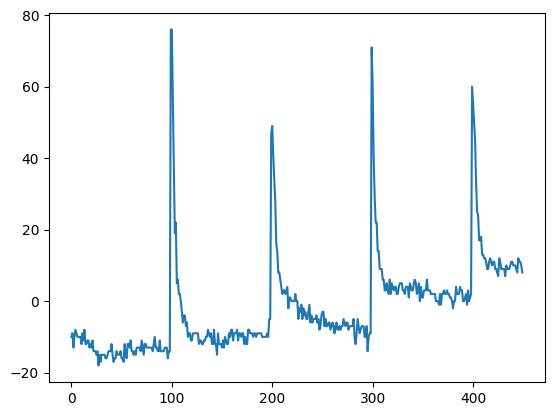

In [32]:
plt.plot(cumsum[:, 183,438])

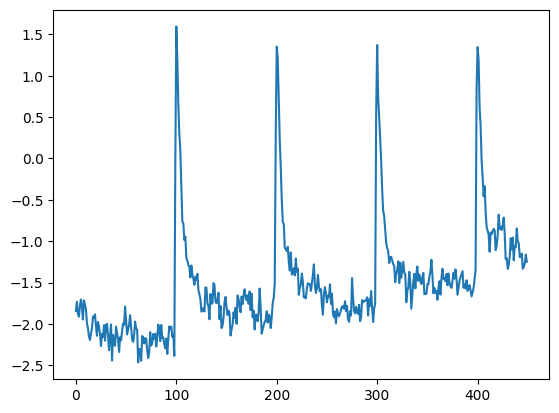

In [30]:
cumsum = np.cumsum(ImageObj.imgDiff_Conv, axis=0)
plt.plot(np.mean(cumsum, axis=(1,2)))

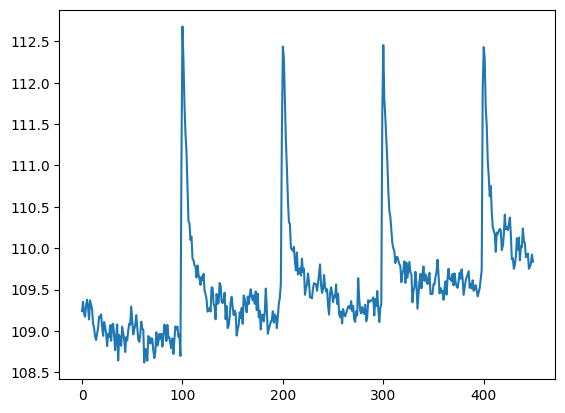

In [21]:
plt.plot(np.mean(denoised, axis=(1,2)))

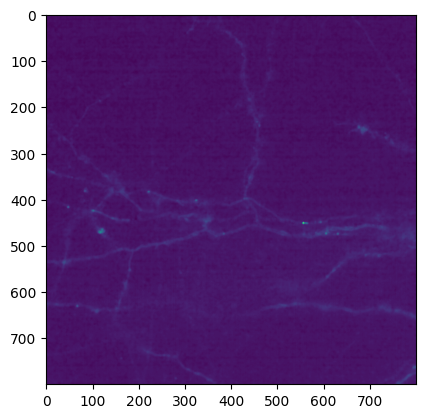

In [26]:
plt.imshow(denoised[0])

In [27]:
ImageObj._imgDenoised = denoised

In [28]:
neuro.Get_API().GUI.NewImageProvided()